<a href="https://colab.research.google.com/github/p25-c4/car/blob/main/0317_SG_%EC%83%81%ED%92%88%ED%8C%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [ ]:
!nvidia-smi

Fri Mar 15 15:22:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# !rm ~/.cache/matplotlib -rf

In [ ]:
import os
os.chdir("/content/drive/MyDrive/BigData/early_project")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글폰트 설정
mpl.rc("font",family = "NanumGothic")
mpl.rc("axes", unicode_minus = False)

# Data load

In [ ]:
users = pd.read_csv("on_users.csv", encoding='cp949')
print(users.shape)
users.head()

(3000, 5)


,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y


In [ ]:
orders = pd.read_csv("on_orders.csv", encoding='cp949')
print(orders.shape)
orders.head()

(1043272, 6)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M12-S0070-1113,17030,04DEC2021:03:26:00
1,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M15-S0140-1247,7680,04DEC2021:03:26:00
2,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L1-M23-S0580-1047,12420,04DEC2021:03:26:00
3,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M12-S0640-1010,6250,04DEC2021:03:26:00
4,U10001,U10001-O2021-1001,03DEC2021:20:59:27,L4-M17-S0130-1018,14450,04DEC2021:03:26:00


In [ ]:
items = pd.read_csv("on_items.csv", encoding='utf-8')
print(items.shape)
items.head()

(11019, 11)


,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
0,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입(가공식품),2021,15840,16130
1,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입(가공식품),2022,17030,17340
2,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입(가공식품),2023,17380,18640
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160


## order에 Delay_YN 열 추가

In [ ]:
# OrderDT와 DeliveryDT 타입 변경
orders['OrderDT'] = pd.to_datetime(orders['OrderDT'], format='%d%b%Y:%H:%M:%S')
orders['DeliveryDT'] = pd.to_datetime(orders['DeliveryDT'], format='%d%b%Y:%H:%M:%S')
# DeliveryDT가 오전 7시보다 늦으면 'Y', 이전이면 'N'인 파생 변수 생성
orders['Delay_YN'] = orders['DeliveryDT'].dt.hour >= 7
orders['Delay_YN'] = orders['Delay_YN'].map({True: 1, False: 0}) # 지연: 1, 지연X: 0

## order와 item 합치기

In [ ]:
## order와 item 합치기
# items에서 PriceYear, PriceMax, PriceMin 제거 --> 중복된 data가 들어가는 것을 막기 위함
items_NoPrice = items.iloc[:,:-3]

order_item_df = pd.merge(orders, items_NoPrice, on='ItemCode', how='left')

# 병합된 데이터프레임의 처음 몇 행을 출력하여 확인
order_item_df = order_item_df.drop_duplicates(ignore_index= True)
print(order_item_df.shape)
order_item_df.head()

(1043272, 14)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,냉동,S0140,냉동,베지가든 수제교자만두 매콤한 김치맛 720g (360gx2개입)
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,축산,S0580,치즈,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,과일,S0640,토마,[계양구 배달] 싱싱한 방울토마토 750g [작전 과일나라]
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,수산,S0130,낙지,낙지호롱 900g 20-25개 낙지꼬치구이 냉동낙지 (양념소스70gx1팩 제공)


# check the data

## 결측치 및 이상치 탐지

In [ ]:
# 결측치 탐지(결측치 없음)
print(orders.isnull().sum(),
      users.isnull().sum(),
      items.isnull().sum())

idUser        0
idOrder       0
OrderDT       0
ItemCode      0
Price         0
DeliveryDT    0
Delay_YN      0
dtype: int64 idUser         0
Gender         0
Age            0
FamilyCount    0
MemberYN       0
dtype: int64 ItemLargeCode     0
ItemLargeName     0
ItemMiddleCode    0
ItemMiddleName    0
ItemSmallCode     0
ItemSmallName     0
ItemCode          0
ItemName          0
PriceYear         0
PriceMin          0
PriceMax          0
dtype: int64


최소 나이:  21 
 최대 나이:  69
최소 구성원 수:  0 
 최대 구성원 수:  3


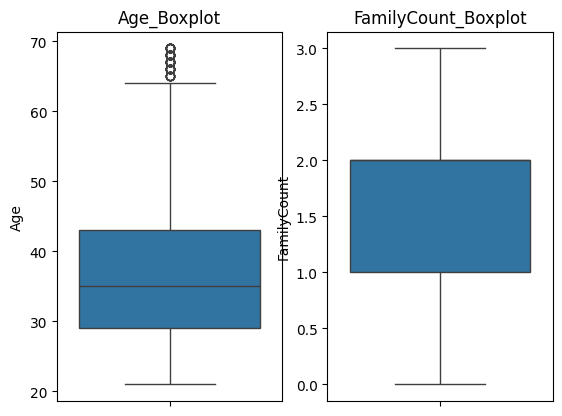

In [ ]:
# 이상치 탐지(나이, 가족 구성원 수) --> 이상치 없음
plt.subplots(ncols=2)

plt.subplot(121)
sns.boxplot(data = users, y = 'Age')
plt.title("Age_Boxplot")
print("최소 나이: ", np.min(users['Age']), "\n", "최대 나이: ", np.max(users['Age']))

plt.subplot(122)
sns.boxplot(data = users, y = 'FamilyCount')
plt.title("FamilyCount_Boxplot")
print("최소 구성원 수: ", np.min(users['FamilyCount']), "\n", "최대 구성원 수: ", np.max(users['FamilyCount']))


In [ ]:
# 주문에서 대분류 비율 확인("신선식품", "가공식품", "생수", "음료")
order_item_df['ItemLargeName'].value_counts(normalize=True)

신선식품    0.515327
가공식품    0.464597
음료      0.015895
생수      0.004181
Name: ItemLargeName, dtype: float64

# preprocessing

## not_food 처리

In [ ]:
# list of not food --> 시간 오래 걸렸음
not_food = ["냄비", "기계", "디스펜서", "퍼즐", "냉장고", "밀폐용기",
            "액자", "수동 반죽펴기", "채칼", "캔따기", "모자",
            "카지노","용기","케이스","만두통", "바람개비", "레깅스", "수박 나무라고요",
            "스텐 상추바구니 2호 야채 튀김 과일 바스켓 채반",
            "스테인레스 상추바구니 1호 메쉬바구니 소쿠리 채반",
            "스텐 타공상추바구니 2호","수박과도 大 (10개묶음) 0151","양상추 1cm 샌들 슬리퍼  JG6 (7157830)",
            "후르츠커버포켓크로스백(수박)", "양상추 여름 블라우스 JAP60 (7271217)", "양상추 여자 슬랙스 BF33 (7416269)",
            "양상추 여자 여름샌들 JK131 (7162818)", "MT124 A4 참외색 매직터치 두성 180g 10매입 X ( 3세트 )",
            "에이프릴래빗 양상추 스트링 빅포켓 숏야상점퍼 MA0906 (6660376)", "사랑에 빠진 과일토퍼 - 참외",
            "[총알배송] 제오닉 화채 수박통 8L 채반 믹싱볼 샐러드볼 판촉물 답례품 사은",
            "익사이팅 컬러링토이 유화물감 스포츠 스포츠 참외",
            "[하프클럽/한샘]SOK 프레시 여름 사각 수박용기 4L 2P",
            "참외 모형 1P (소)", "양상추키우기 7종", "양상추키우기 7종 채소키우기", "나 채소",
            "초 가을 계절 개성 캐쥬얼 참외 껍질 쿨링 여성", "22511712S3488857739", "타공 상추 바구니 2호 과일채소 씻어 빠른건조 주방",
            "OBSESSION 100g150g200g250g300g Kabura Bullet 금속 지그 헤드 오징어 어시", "나혼자키운다(대파)",
            "밀폐용기 42호 3L 2P세트 수박보관통 과일 대파 냉장고수납 야채 냉동실정리", "양파 대파 감자 마늘 생강 조개 과일망 메시 메쉬 그물망 일자형",
            "기타보관용기 지혜 냉동만두 수납함 다층 물만두 전용", "냉장고박스 Shujiabao.만두케이스 냉동만두 다층", "(5개묶음)까기쉬운 삼덕 밤가위 색상랜덤발송 밤까기",
            "낮과 밤을 만들어요 5명 set", "달의 위상과 지구의 낮과 밤 5인용", "반고흐 패브릭 포스터 별이빛나는밤 M", "밤깍는 생활 생밤칼 주방","별이 빛나는 밤에 반지 폭3mm 전체925실버",
            "별이 빛나는 밤에 반지 폭3mm 전체925실버", "코르크메모지 액자(산타는 밤에 와요) 5인용 집콕놀이", "통조림 캔따개 황도 참치 꽁치 따개 캔 오프너 업소용",
            "황도12궁풀러렌축구공 10인용", "그린 고사리 부쉬 조화", "그린 고사리설악초 페이퍼바스켓세트 조화 실크플라워", "인조나무 인테리어 조화 화분 솔향고사리 2P SET",
            "기타보관용기 만두통 냉동만두 가정용 급속냉동", "냉장고박스 만두케이스 계란 신선보존 훈툰만두 냉동",
            "냉장고박스 만두케이스 냉동만두 가정용 급속냉동", "냉장고박스 만두케이스 냉동만두 다층 가정용 급속냉동 혼돈",
            "쟁반 급속냉동 반달형 물만두 수납함 냉동만두", "정리함 만두통 냉동만두 전용 물만두 받침판 냉장고","초대형 물고기 미끼 20cm 80g 대형 포퍼 지깅 도구 저크 베이트 낚시 루어 태",
            "뇨끼판 뇨끼 보드 파스타 반죽 국수 면 만드는 도구", "클레어 파스타집게 다용도 샐러드 면요리용 조리도구"
            ]
len(not_food)

68

In [ ]:
# ItemName에 not_food의 값이 포함된 경우 추출
not_food_order_item = order_item_df[order_item_df['ItemName'].apply(lambda x: any(item for item in not_food if item in x))]
print(not_food_order_item.shape)
not_food_order_item.head()

(24561, 14)


,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName
103,U10001,U10001-O2021-1021,2021-09-11 08:18:12,L4-M12-S0430-1008,1320,2021-09-13 05:56:00,0,L4,신선식품,M12,과일,S0430,수박,DIY614 수박바람개비만들기
107,U10001,U10001-O2021-1022,2021-08-31 17:06:38,L1-M15-S0140-1357,26770,2021-09-01 06:36:00,0,L1,가공식품,M15,냉동,S0140,냉동,쟁반 급속냉동 반달형 물만두 수납함 냉동만두
186,U10001,U10001-O2022-1009,2022-09-28 18:40:30,L4-M12-S0560-1016,13780,2022-09-29 05:41:00,0,L4,신선식품,M12,과일,S0560,참외,초 가을 계절 개성 캐쥬얼 참외 껍질 쿨링 여성 22511712S3488857739
284,U10001,U10001-O2023-1003,2023-11-29 19:40:33,L1-M11-S0280-1051,26940,2023-11-30 06:58:00,0,L1,가공식품,M11,곡물,S0280,밤,낮과 밤을 만들어요 5명 set
295,U10001,U10001-O2023-1004,2023-12-06 15:25:42,L4-M12-S0430-1013,22900,2023-12-07 06:32:00,0,L4,신선식품,M12,과일,S0430,수박,[하프클럽/한샘]SOK 프레시 여름 사각 수박용기 4L 2P


    - 총 24357 개(총 주문 데이터의 약 2%)
    - 분석 대상이 아님 --> 제외

In [ ]:
# order_item_df 에서 not_food 제거
order_item_df = order_item_df.drop(index = not_food_order_item.index)

In [ ]:
## users에 Agegroup 추가
# Age 열을 기준으로 연령대별로 분류
bins = [19, 29, 39, 49, 59, 69]  # 연령대 경계값
labels = ['20s', '30s', '40s', '50s', '60s']  # 각 연령대에 해당하는 라벨
users['AgeGroup'] = pd.cut(users['Age'], bins=bins, labels=labels, right=True)

In [ ]:
order_item_df.columns

Index(['idUser', 'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT',
       'Delay_YN', 'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode',
       'ItemMiddleName', 'ItemSmallCode', 'ItemSmallName', 'ItemName'],
      dtype='object')

In [ ]:
# 3개 파일 모두 합치기
order_user_item = pd.merge(users, order_item_df, on='idUser', how='right')
order_user_item.shape

(1018711, 19)

In [ ]:
# OrderDT 열을 datetime 객체로 변환
order_user_item['OrderDT'] = pd.to_datetime(order_user_item['OrderDT'], format='%d%b%Y:%H:%M:%S')

# datetime 객체에서 년을 추출하여 새로운 컬럼 Month에 저장
order_user_item['Year'] = order_user_item['OrderDT'].dt.year
# datetime 객체에서 월을 추출하여 새로운 컬럼 Month에 저장
order_user_item['Month'] = order_user_item['OrderDT'].dt.month
# datetime 객체에서 일을 추출하여 새로운 컬럼 Month에 저장
order_user_item['Day'] = order_user_item['OrderDT'].dt.day
# datetime 객체에서 시를 추출하여 새로운 컬럼 Month에 저장
order_user_item['Hour'] = order_user_item['OrderDT'].dt.hour
order_user_item.head()

,idUser,Gender,Age,FamilyCount,MemberYN,AgeGroup,idOrder,OrderDT,ItemCode,Price,...,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName,Year,Month,Day,Hour
0,U10001,여성,26,2,Y,20s,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,...,가공식품,M12,과일,S0070,과일,이츠웰 후르츠칵테일 과일통조림 3K 슬라이스,2021,12,3,20
1,U10001,여성,26,2,Y,20s,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,...,가공식품,M15,냉동,S0140,냉동,베지가든 수제교자만두 매콤한 김치맛 720g (360gx2개입),2021,12,3,20
2,U10001,여성,26,2,Y,20s,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,...,가공식품,M23,축산,S0580,치즈,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,2021,12,3,20
3,U10001,여성,26,2,Y,20s,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,...,신선식품,M12,과일,S0640,토마,[계양구 배달] 싱싱한 방울토마토 750g [작전 과일나라],2021,12,3,20
4,U10001,여성,26,2,Y,20s,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,...,신선식품,M17,수산,S0130,낙지,낙지호롱 900g 20-25개 낙지꼬치구이 냉동낙지 (양념소스70gx1팩 제공),2021,12,3,20


# item + order EDA
    - 품목(대분류, 중분류, 소분류, 아이템)별 판매량 & 매출 --> 비율이 거의 비슷
    - 몇 시까지 주문해야 다음 날 오는지 --> 21시
    - 배송지연 (아침 7시 기준) --> Delay_YN 파생변수 -->
    

## 품목별 판매량 & 매출

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

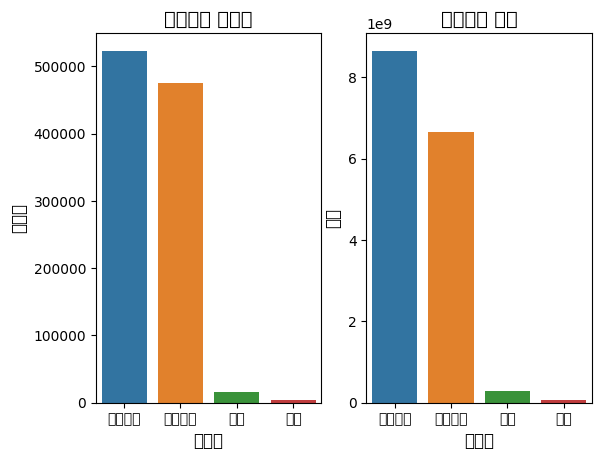

In [ ]:
### 대분류별 판매량 & 매출 그래프

## 대분류별 판매량 그래프
# 대분류별 판매량
Q_Large = order_user_item.groupby("ItemLargeName")['ItemCode'].count()

# 'Q_Large'를 데이터프레임으로 변환하고 'ItemLargeName'과 'Count' 열 이름을 지정
Q_Large_df = Q_Large.reset_index(name='Count')

# 'Count'를 기준으로 내림차순 정렬
Q_Large_sorted = Q_Large_df.sort_values(by='Count', ascending=False)

# Seaborn으로 내림차순 정렬된 바 차트 시각화
plt.subplot(121)
sns.barplot(y='Count', x='ItemLargeName', data=Q_Large_sorted, hue='ItemLargeName')

# 그래프 제목 설정
plt.title('대분류별 판매량', fontsize=14)

# x, y축 라벨 설정
plt.xlabel('대분류', fontsize=12)
plt.ylabel('판매량', fontsize=12)

# 그래프 표시
# plt.show()

## 대분류별 매출 그래프
# ItemLargeName별로 Price의 합계를 계산
price_sum_by_large = order_user_item.groupby('ItemLargeName')['Price'].sum().reset_index()

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
price_sum_by_large['ItemLargeName'] = pd.Categorical(price_sum_by_large['ItemLargeName'], categories=ordered_categories, ordered=True)

# 정렬된 데이터를 바탕으로 그래프를 그림
plt.subplot(122)
#plt.figure(figsize=(10, 6))
sns.barplot(x='ItemLargeName', y='Price', data=price_sum_by_large, hue='ItemLargeName')

# 그래프 제목 및 축 라벨 설정
plt.title('대분류별 매출', fontsize=14)
plt.xlabel('대분류', fontsize=12)
plt.ylabel('매출', fontsize=12)


plt.show()

<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  plt.tight_layout()
<ipython-input-23-6c93d2c7128b>:63: UserWarning: Glyph 

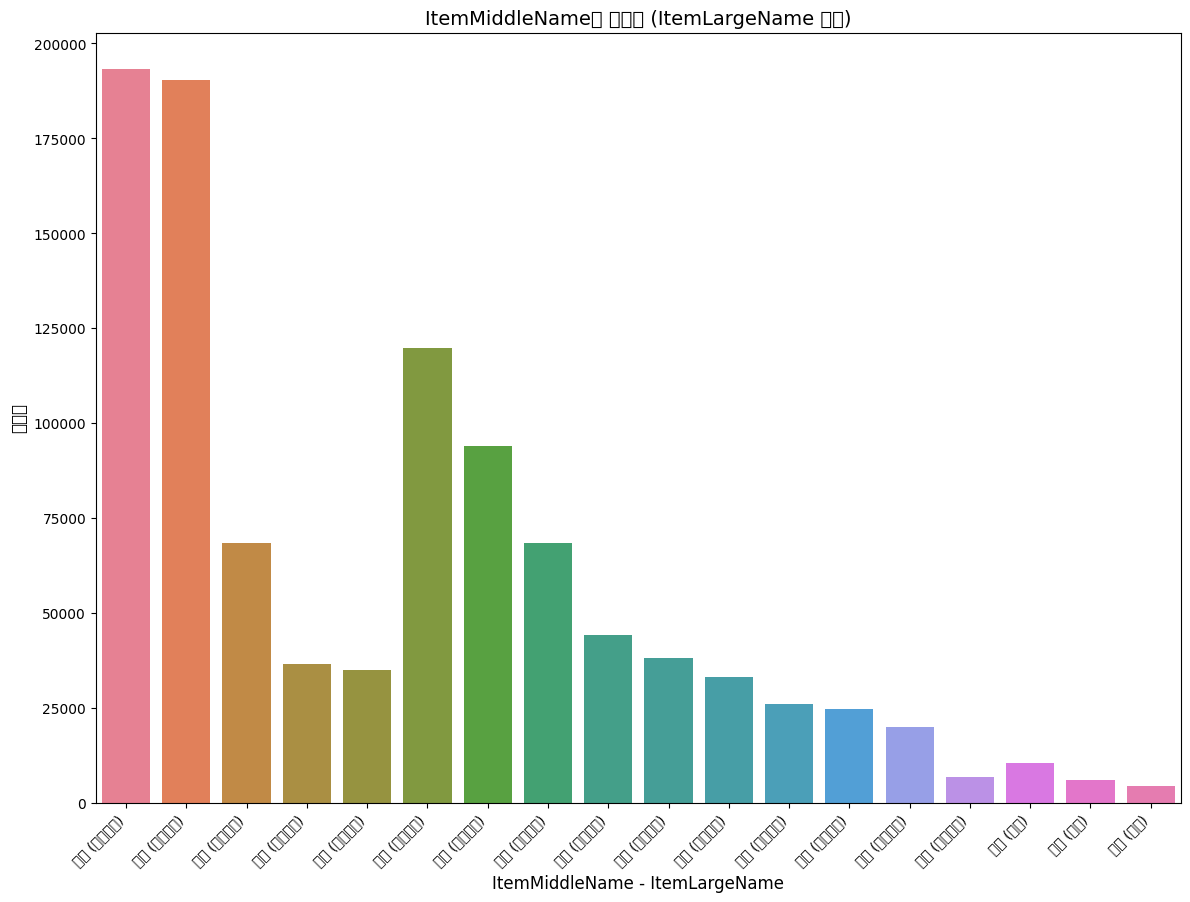

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


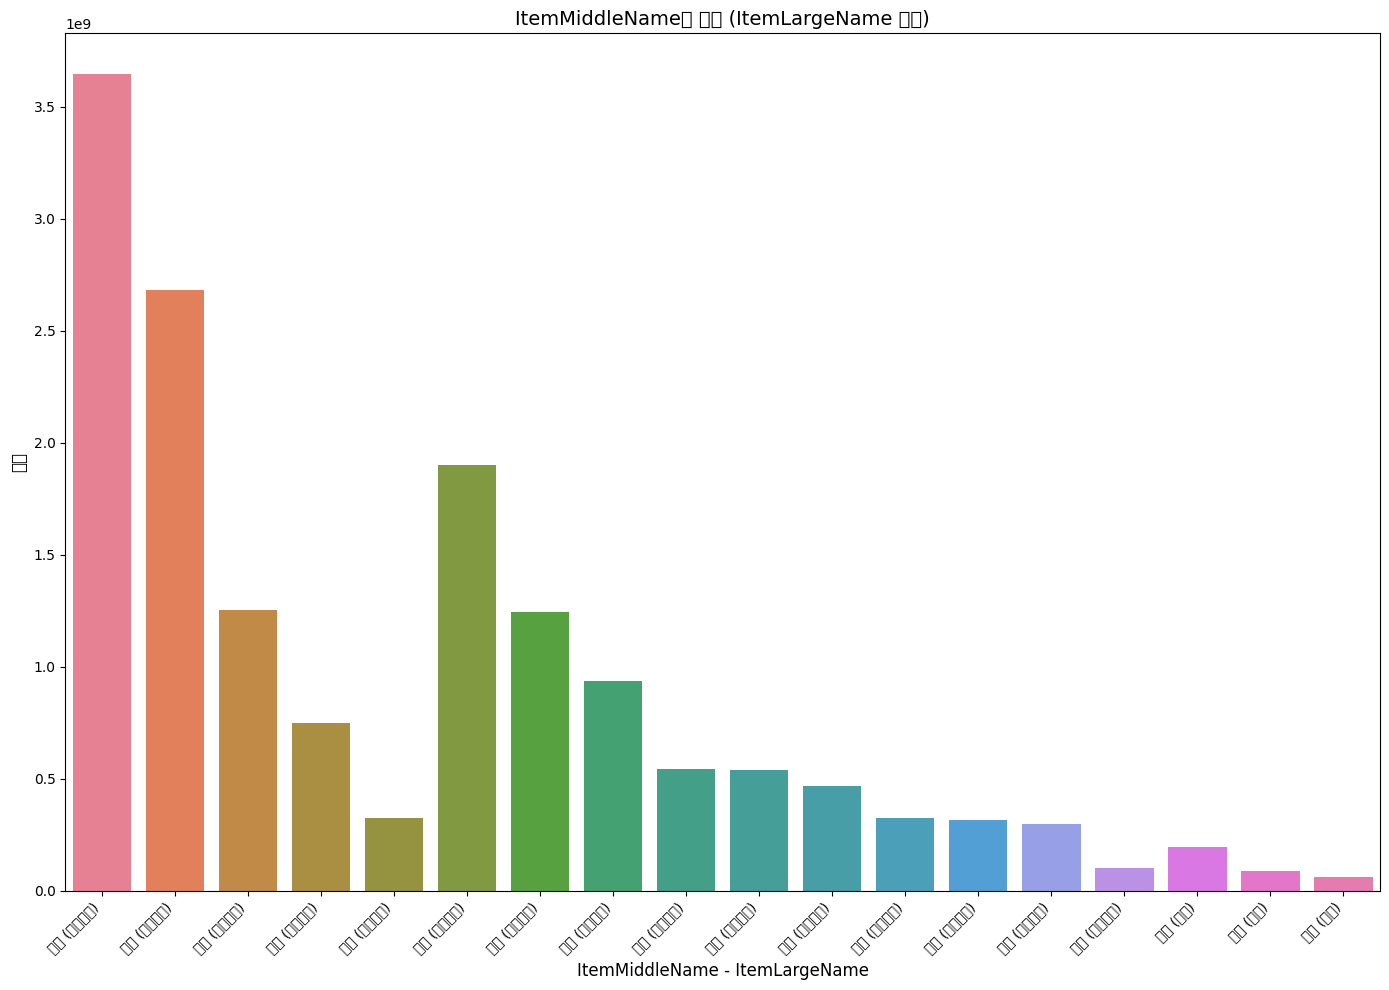

In [ ]:
## 중분류별 판매량 그래프
# ItemLargeName과 ItemMiddleName별로 판매량(각 ItemCode의 개수)을 집계
sales_counts = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName'])['ItemCode'].count().reset_index(name='SalesCount')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
sales_counts['ItemLargeName'] = pd.Categorical(sales_counts['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemMiddleName'과 'ItemLargeName'을 결합하여 이중축 라벨 생성
sales_counts['DualAxisLabel'] = sales_counts['ItemMiddleName'] + " (" + sales_counts['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 판매량으로 내림차순 정렬
sales_counts_sorted = sales_counts.sort_values(by=['ItemLargeName', 'SalesCount'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 판매량 바 차트 그리기
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DualAxisLabel', y='SalesCount', data=sales_counts_sorted, hue='DualAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemMiddleName - ItemLargeName', fontsize=12)
plt.ylabel('판매량', fontsize=12)
plt.title('ItemMiddleName별 판매량 (ItemLargeName 구분)', fontsize=14)


## 중분류별 매출 그래프
# ItemLargeName과 ItemMiddleName별로 판매량(각 ItemCode의 개수)을 집계
price_sums = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName'])['Price'].sum().reset_index(name='TotalPrice')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
price_sums['ItemLargeName'] = pd.Categorical(price_sums['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemMiddleName'과 'ItemLargeName'을 결합하여 이중축 라벨 생성
price_sums['DualAxisLabel'] = price_sums['ItemMiddleName'] + " (" + price_sums['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 판매량으로 내림차순 정렬
price_sums_sorted = price_sums.sort_values(by=['ItemLargeName', 'TotalPrice'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 판매량 바 차트 그리기
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='DualAxisLabel', y='TotalPrice', data=price_sums_sorted, hue='DualAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemMiddleName - ItemLargeName', fontsize=12)
plt.ylabel('매출', fontsize=12)
plt.title('ItemMiddleName별 매출 (ItemLargeName 구분)', fontsize=14)



# 그래프 표시
plt.tight_layout()
plt.show()

<Figure size 500x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

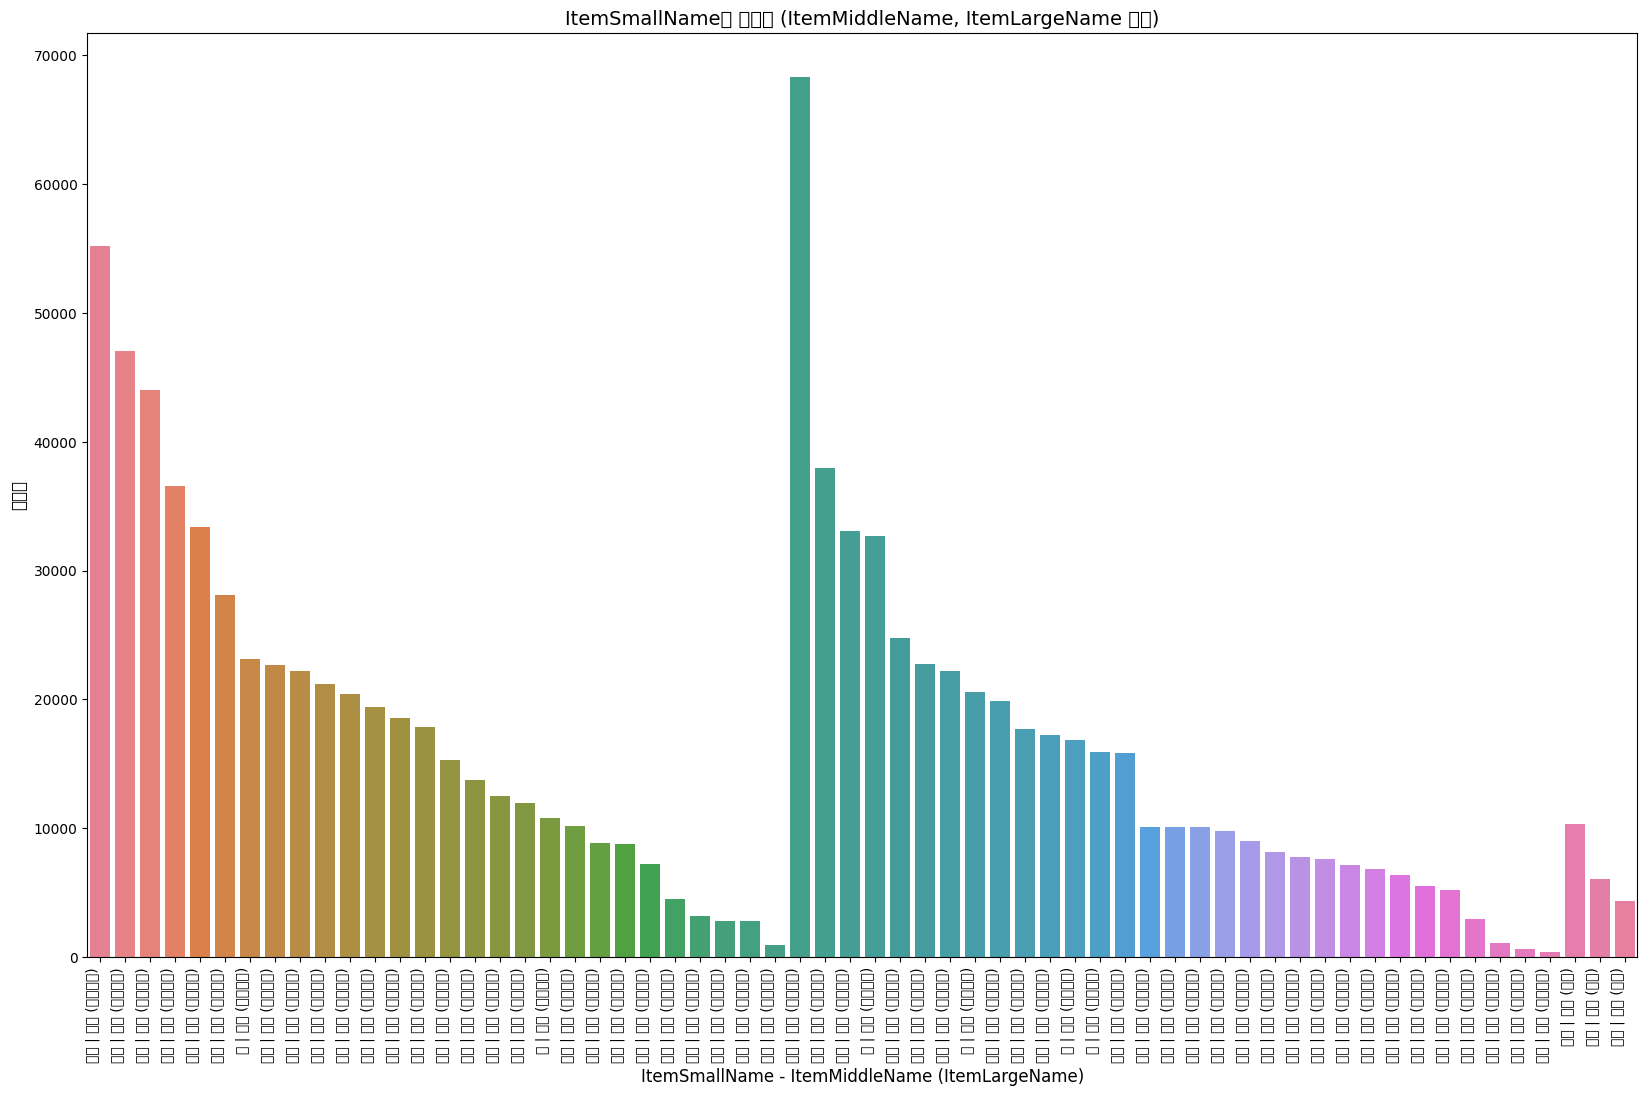

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


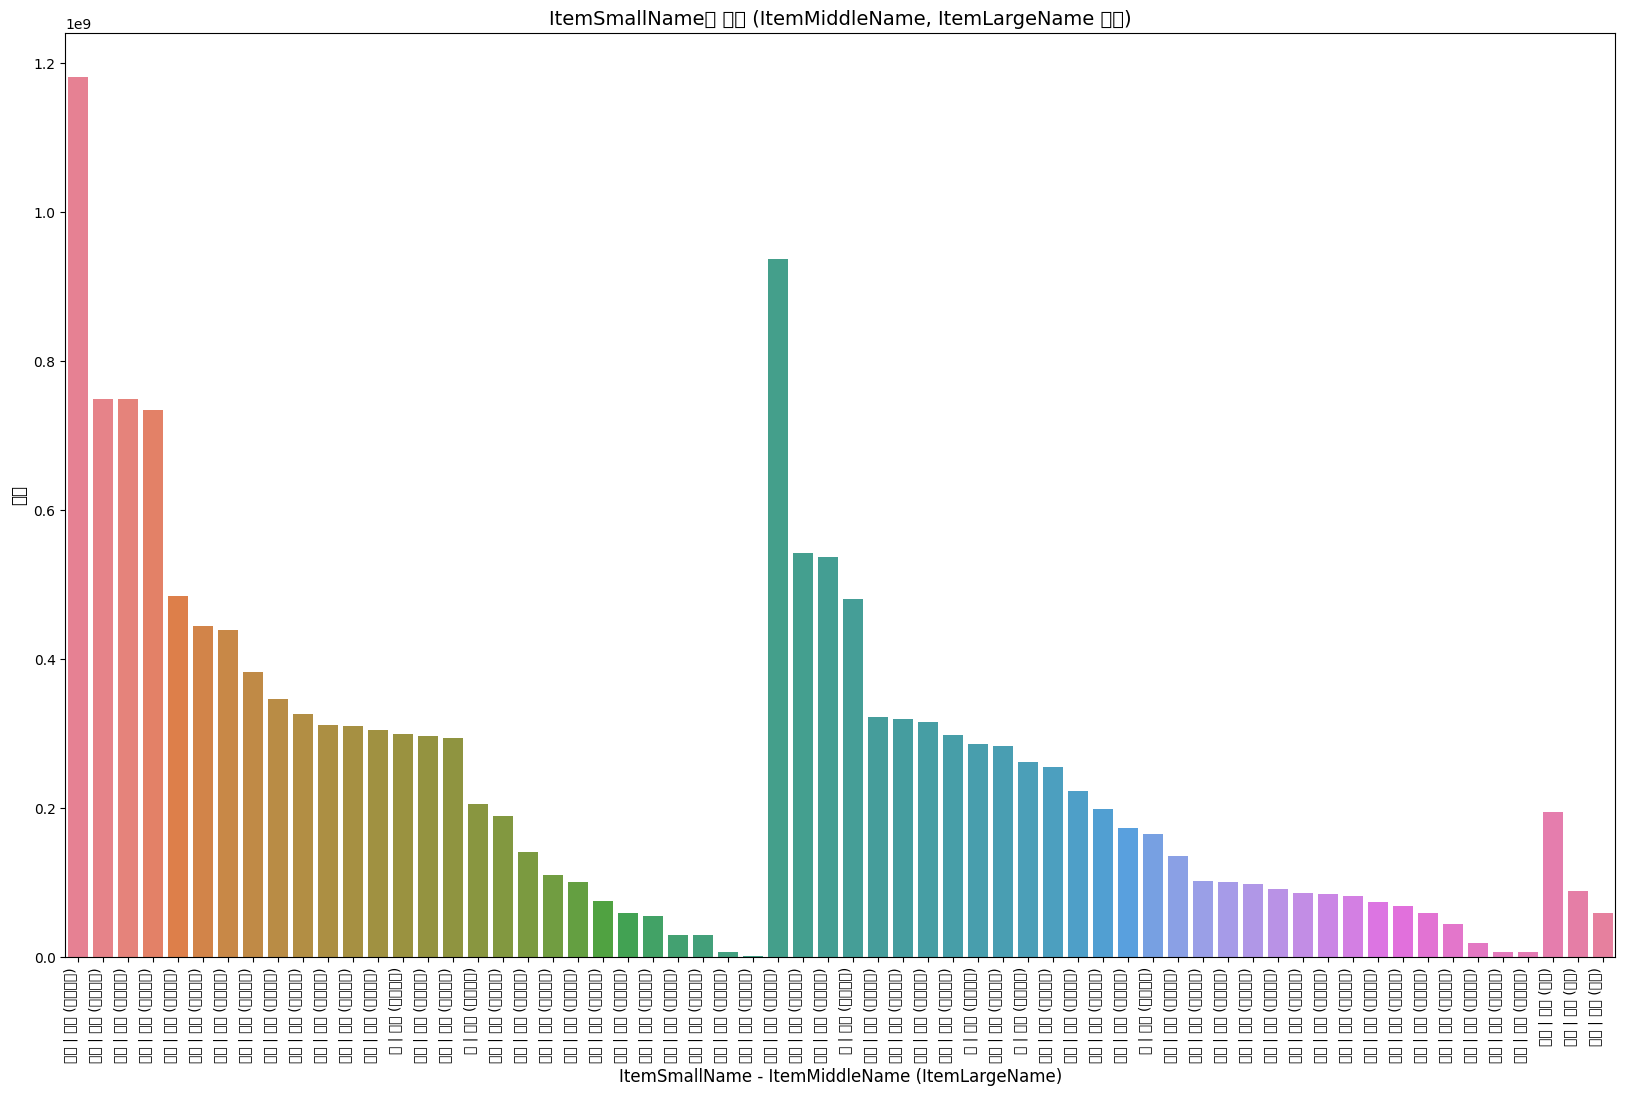

In [ ]:
### 소분류별 판매량 & 매출 그래프
plt.figure(figsize=(5, 6))

## 소분류별 판매량 그래프
# ItemSmallName, ItemMiddleName, ItemLargeName별로 판매량(각 ItemCode의 개수)을 집계
sales_counts = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName', 'ItemSmallName'])['ItemCode'].count().reset_index(name='SalesCount')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
sales_counts['ItemLargeName'] = pd.Categorical(sales_counts['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemSmallName', 'ItemMiddleName', 'ItemLargeName'을 결합하여 삼중축 라벨 생성
sales_counts['TripleAxisLabel'] = sales_counts['ItemSmallName'] + " | " + sales_counts['ItemMiddleName'] + " (" + sales_counts['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 판매량으로 내림차순 정렬
sales_counts_sorted = sales_counts.sort_values(by=['ItemLargeName', 'SalesCount'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 판매량 바 차트 그리기

plt.figure(figsize=(20, 12))
barplot = sns.barplot(x='TripleAxisLabel', y='SalesCount', data=sales_counts_sorted, hue='TripleAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemSmallName - ItemMiddleName (ItemLargeName)', fontsize=12)
plt.ylabel('판매량', fontsize=12)
plt.title('ItemSmallName별 판매량 (ItemMiddleName, ItemLargeName 구분)', fontsize=14)

## 소분류별 매출 그래프
# ItemLargeName, ItemMiddleName, ItemSmallName별로 Price의 합계를 계산
price_sums = order_user_item.groupby(['ItemLargeName', 'ItemMiddleName', 'ItemSmallName'])['Price'].sum().reset_index(name='TotalPrice')

# 지정된 ItemLargeName 순서
ordered_categories = ['신선식품', '가공식품', '음료', '생수']

# 'ItemLargeName' 열을 Categorical 타입으로 변환하고 지정된 순서를 적용
price_sums['ItemLargeName'] = pd.Categorical(price_sums['ItemLargeName'], categories=ordered_categories, ordered=True)

# 'ItemSmallName', 'ItemMiddleName', 'ItemLargeName'을 결합하여 삼중축 라벨 생성
price_sums['TripleAxisLabel'] = price_sums['ItemSmallName'] + " | " + price_sums['ItemMiddleName'] + " (" + price_sums['ItemLargeName'].astype(str) + ")"

# ItemLargeName 순서에 따라 정렬하고, 동일 ItemLargeName 내에서는 TotalPrice로 내림차순 정렬
price_sums_sorted = price_sums.sort_values(by=['ItemLargeName', 'TotalPrice'], ascending=[True, False])

# Seaborn을 이용해 한 그래프 안에 TotalPrice 바 차트 그리기

plt.figure(figsize=(20, 12))
barplot = sns.barplot(x='TripleAxisLabel', y='TotalPrice', data=price_sums_sorted, hue='TripleAxisLabel')

# x축 라벨 회전 및 폰트 사이즈 조정
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# x, y축 및 타이틀 라벨 설정
plt.xlabel('ItemSmallName - ItemMiddleName (ItemLargeName)', fontsize=12)
plt.ylabel('매출', fontsize=12)
plt.title('ItemSmallName별 매출 (ItemMiddleName, ItemLargeName 구분)', fontsize=14)

# 출력
plt.show()

    - 대분류별이든, 중분류별이든, 소분류별이든 판매량 비율이 매출 비율과 거의 비슷함.

## 주문 ID별로 아이템 코드가 2개 이상인 것들

In [ ]:
## 주문 ID 별로 아이템 코드가 2개 이상인 것들

# idOrder와 ItemCode로 그룹화
grouped = order_user_item.groupby(['idOrder', 'ItemCode']).size()

# 크기가 1보다 큰 그룹을 필터링하여 해당하는 'idOrder'와 'ItemCode'의 조합을 찾음
duplicates = grouped[grouped > 1].reset_index()[['idOrder', 'ItemCode']]

# 위에서 찾은 'idOrder'와 'ItemCode'의 조합을 가진 원본 데이터에서 해당하는 행들만 추출
filtered_orders = pd.merge(order_item_df, duplicates, on=['idOrder', 'ItemCode'])

# 결과 확인
print(filtered_orders)

Empty DataFrame
Columns: [idUser, idOrder, OrderDT, ItemCode, Price, DeliveryDT, Delay_YN, ItemLargeCode, ItemLargeName, ItemMiddleCode, ItemMiddleName, ItemSmallCode, ItemSmallName, ItemName]
Index: []


    - 같은 주문id 별로 같은 아이템코드가 2개 이상 나온 경우 없음.

## 배송지연율

In [ ]:
order_user_item.drop_duplicates(subset = 'idOrder')['Delay_YN'].mean()

0.041039354587034074

    - 배송지연율 약 4.1%

## 익일 새벽배송이 안 되는 주문시간 찾기

In [ ]:
# OrderDT와 DeliveryDT의 차이가 2일 이상인 항목 찾기

# OrderDT와 DeliveryDT를 datetime 타입으로 변환
order_user_item['OrderDT'] = pd.to_datetime(order_user_item['OrderDT'], format='%d%b%Y:%H:%M:%S')
order_user_item['DeliveryDT'] = pd.to_datetime(order_user_item['DeliveryDT'], format='%d%b%Y:%H:%M:%S')

# OrderDT와 DeliveryDT의 차이를 계산 (날짜 차이이므로 timedelta 객체로 반환됨)
date_diff = (order_user_item['DeliveryDT'] - order_user_item['OrderDT']).dt.days

print(date_diff.value_counts())

# 차이가 -2 이상인 항목의 인덱스 찾기
target_indexes = date_diff[date_diff >= 2].index

# 해당 조건에 맞는 인덱스의 OrderDT 출력
target_order_dt_exact = order_user_item.loc[target_indexes, 'OrderDT']

# unique한 값만 추출하고, 시간을 기준으로 오름차순 정렬
unique_target_order_dt_exact = target_order_dt_exact.drop_duplicates().sort_values()

unique_target_order_dt_exact

0    833140
1    167761
2     17810
dtype: int64


818614   2021-01-01 21:03:49
109933   2021-01-01 21:04:08
456866   2021-01-01 21:13:39
693627   2021-01-01 21:15:35
161034   2021-01-01 21:22:11
                 ...        
948795   2023-12-29 23:18:51
998327   2023-12-29 23:36:59
150723   2023-12-29 23:51:48
13685    2023-12-29 23:52:18
357795   2023-12-30 00:51:35
Name: OrderDT, Length: 3014, dtype: datetime64[ns]

    - 대략 9시가 마지노선임을 알 수 있음

## 주문별 적게 시킨 주문id + 멤버십 가입 유무

In [ ]:
order_price_sum = order_user_item.groupby('idOrder')['Price'].sum().reset_index()

# orders와 users 데이터를 결합하기 전에, IDUser를 기준으로 users 데이터를 orders 데이터에 매핑
orders_df_merged = pd.merge(order_user_item[['idOrder', 'idUser']], users[['idUser', 'MemberYN']], on='idUser', how='left')

# 중복 제거를 위해 IDOrder와 MemberYN만 남기고 중복 제거
orders_df_merged_unique = orders_df_merged.drop_duplicates(subset=['idOrder'])

# IDOrder별 Price 합계와 MemberYN 정보를 결합
order_price_sum_with_membership = pd.merge(order_price_sum, orders_df_merged_unique[['idOrder', 'MemberYN']], on='idOrder', how='left')

# Price 합계 기준으로 내림차순 정렬하고 상위 5개 선택
top_5_orders_with_membership = order_price_sum_with_membership.sort_values(by='Price', ascending=False).tail(10)

top_5_orders_with_membership

,idOrder,Price,MemberYN
121666,U12064-O2021-1011,1560,Y
57150,U10974-O2021-1015,1530,Y
56655,U10966-O2021-1022,1420,Y
18765,U10319-O2021-1004,1420,Y
154428,U12623-O2021-1007,1410,Y
87813,U11491-O2021-1017,1300,Y
168951,U12866-O2021-1014,1240,Y
21643,U10367-O2021-1001,1240,N
122067,U12070-O2021-1005,1160,Y
85395,U11450-O2021-1021,1150,N


In [ ]:
order_user_item.loc[order_user_item['idOrder'] == 'U11450-O2021-1021',:]

,idUser,Gender,Age,FamilyCount,MemberYN,AgeGroup,idOrder,OrderDT,ItemCode,Price,...,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName,Year,Month,Day,Hour
491095,U11450,남성,36,0,N,30s,U11450-O2021-1021,2021-09-27 20:50:24,L1-M11-S0220-1121,1150,...,가공식품,M11,곡물,S0220,라면,컵라면 농심 새우탕 큰사발 115g 사발면 라면 야식,2021,9,27,20


    - 한 번 주문에 가장 적은 비용을 지불한 사람은 새우탕 하나를 주문했음
    - 배송에 가격 제한이 없음을 알 수 있음

## 고객 조합 별 판매량 top 10

In [ ]:
grouped = order_user_item.groupby(['AgeGroup', 'Gender', 'FamilyCount', 'ItemSmallName']).size().reset_index(name='Count')
grouped['Rank'] = grouped.groupby(['AgeGroup', 'Gender', 'FamilyCount'])['Count'].rank(method='first', ascending=False)

# 각 그룹별 상위 10개의 ItemSmallName을 선택합니다.
top_10_per_combination = grouped[grouped['Rank'] <= 10]

# 조합 컬럼을 생성합니다.
top_10_per_combination['Combination'] = top_10_per_combination['AgeGroup'].astype(str) + "_" + top_10_per_combination['Gender'].astype(str) + "_" + top_10_per_combination['FamilyCount'].astype(str)

# 피벗 테이블을 생성합니다. 이 때, 순위를 행으로, 조합을 열로, 그리고 값으로는 ItemSmallName을 사용합니다.
pivot = top_10_per_combination.pivot(index='Rank', columns='Combination', values='ItemSmallName').fillna('')

print(pivot)

Combination 20s_남성_0 20s_남성_1 20s_남성_2 20s_남성_3 20s_여성_0 20s_여성_1 20s_여성_2  \
Rank                                                                         
1.0               냉동       냉동       냉동       냉동       냉동       냉동       냉동   
2.0               사과       사과       사과       사과       사과       사과       사과   
3.0               고구       고구       고구       고구       토마       고구       고구   
4.0               토마       토마       토마       토마       고구       토마       토마   
5.0               김치       즉석       즉석       김치       즉석       즉석       즉석   
6.0               즉석       김치       김치       즉석       김치       김치       호박   
7.0                김       호박       호박        김       호박       커피       김치   
8.0               커피        김        김       커피       커피        김       커피   
9.0               고등       커피       커피       호박        김       호박        김   
10.0              호박       고등       고등       고등       고등       고등       고등   

Combination 20s_여성_3 30s_남성_0 30s_남성_1  ... 50s_여성_2 50s_여성_3 6

<ipython-input-30-53cccf760dd3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_per_combination['Combination'] = top_10_per_combination['AgeGroup'].astype(str) + "_" + top_10_per_combination['Gender'].astype(str) + "_" + top_10_per_combination['FamilyCount'].astype(str)


## 제품 이름에 '만두', '교자'가 들어간 냉동 목록

In [ ]:
mandu = items[(items['ItemMiddleName'] == '냉동') & (items['ItemName'].str.contains('만두|교자|샤오롱바오|샤오롱빠오|딤섬|포자'))]
mandu.shape

NameError: name 'items' is not defined

## sdfdsdsfasd

In [ ]:
order_user_item.columns

Index(['idUser', 'Gender', 'Age', 'FamilyCount', 'MemberYN', 'AgeGroup',
       'idOrder', 'OrderDT', 'ItemCode', 'Price', 'DeliveryDT', 'Delay_YN',
       'ItemLargeCode', 'ItemLargeName', 'ItemMiddleCode', 'ItemMiddleName',
       'ItemSmallCode', 'ItemSmallName', 'ItemName', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [ ]:
order_user_item.groupby("ItemName").count().sort_values(by='idUser', ascending=False)

,idUser,Gender,Age,FamilyCount,MemberYN,AgeGroup,idOrder,OrderDT,ItemCode,Price,...,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,Year,Month,Day,Hour
ItemName,,,,,,,,,,,,,,,,,,,,,
국내가공 마른오징어 몸통 250g 5마리 내외,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
나주배 특품 5kg (6-10과) 신고배 나주직송,571,571,571,571,571,571,571,571,571,571,...,571,571,571,571,571,571,571,571,571,571
수박 지르go 신선한 겨울 하우스 고당도 임산부 꿀수박 5kg,567,567,567,567,567,567,567,567,567,567,...,567,567,567,567,567,567,567,567,567,567
친환경 완숙토마토 2kg 찰토마토 무농약 스윗 설탕 토마토,550,550,550,550,550,550,550,550,550,550,...,550,550,550,550,550,550,550,550,550,550
국내산 마른오징어 중 5마리 300g내외,549,549,549,549,549,549,549,549,549,549,...,549,549,549,549,549,549,549,549,549,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
팔도 팔도 팔도 뽀로로딸기 235mL 48펫,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
제주 삼다수 생수 2L 24병 먹는샘물 안전한 생수-24병(6병 4묶음),26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
코카콜라음료 코카콜라 제로 1.5L 355ML,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [ ]:
len(order_user_item[order_user_item['ItemCode']=='L5-M25-S0630-1076'])

112

In [ ]:
order_user_item[order_user_item['idUser']=='U10164']

,idUser,Gender,Age,FamilyCount,MemberYN,AgeGroup,idOrder,OrderDT,ItemCode,Price,...,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemName,Year,Month,Day,Hour
54824,U10164,남성,37,3,Y,30s,U10164-O2021-1001,2021-01-14 20:26:47,L1-M11-S0660-1036,12110,...,가공식품,M11,곡물,S0660,파스,클레어 파스타집게 다용도 샐러드 면요리용 조리도구,2021,1,14,20
54825,U10164,남성,37,3,Y,30s,U10164-O2021-1001,2021-01-14 20:26:47,L4-M12-S0640-1073,16050,...,신선식품,M12,과일,S0640,토마,알록달록 컬러방울 토마토 750g x 2,2021,1,14,20
54826,U10164,남성,37,3,Y,30s,U10164-O2021-1002,2021-02-25 18:26:00,L1-M21-S0540-1012,22760,...,가공식품,M21,즉석,S0540,즉석,CJ 즉석밥 12개세트 쌀밥 즉석밥,2021,2,25,18
54827,U10164,남성,37,3,Y,30s,U10164-O2021-1002,2021-02-25 18:26:00,L4-M22-S0360-1025,6140,...,신선식품,M22,채소,S0360,상추,꿀비마켓 국내산 포장 양상추 3통 식자재,2021,2,25,18
54828,U10164,남성,37,3,Y,30s,U10164-O2021-1003,2021-03-18 09:37:37,L4-M12-S0350-1020,18170,...,신선식품,M12,과일,S0350,사과,[경상북도]맛있는 사과 8kg(45과내) -흠과-,2021,3,18,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55348,U10164,남성,37,3,Y,30s,U10164-O2023-1037,2023-12-26 17:56:32,L1-M23-S0580-1003,15130,...,가공식품,M23,축산,S0580,치즈,(서울우유) 무색소 체다 슬라이스치즈 멀티 1800g(업소용),2023,12,26,17
55349,U10164,남성,37,3,Y,30s,U10164-O2023-1037,2023-12-26 17:56:32,L4-M12-S0350-1015,17320,...,신선식품,M12,과일,S0350,사과,[경상북도][산지직송] 과즙 가득 경북 의성 사과(꼬마) 2.5kg,2023,12,26,17
55350,U10164,남성,37,3,Y,30s,U10164-O2023-1037,2023-12-26 17:56:32,L4-M12-S0350-1117,28890,...,신선식품,M12,과일,S0350,사과,정품사과 미시마 3kg 중과(부사 14-15과) 2박스,2023,12,26,17
55351,U10164,남성,37,3,Y,30s,U10164-O2023-1037,2023-12-26 17:56:32,L4-M12-S0350-1122,29200,...,신선식품,M12,과일,S0350,사과,청정봉화! 청량산 고랭지 햇살찬山사과 중대과3kg(12과~13과),2023,12,26,17


In [ ]:
order_user_item[order_user_item['idUser']=='U10164']['ItemSmallName'].value_counts()

사과    35
냉동    28
고구    26
즉석    25
호박    24
커피    24
고등    18
김치    17
김     17
생선    16
파     15
토마    15
과일    14
라면    12
키위    12
도라    11
딸기    11
상추    11
파프    10
낙지     9
오징     9
혼합     9
치즈     9
마른     8
잼      8
카레     8
블루     8
스낵     8
밤      8
전복     8
수박     7
풋고     7
돼지     7
빵      7
미역     6
국수     5
계란     5
배      5
당면     5
생수     5
아몬     5
고사     4
소시     4
쇠고     4
맛김     4
파스     3
드레     3
깻잎     2
북어     2
땅콩     2
닭고     1
조기     1
참외     1
탄산     1
Name: ItemSmallName, dtype: int64

In [ ]:
order_user_item[order_user_item['idUser']=='U10167']['ItemSmallName'].value_counts()

냉동    39
고구    28
사과    27
토마    22
호박    20
고등    19
김     18
김치    16
커피    16
파프    14
풋고    14
도라    14
상추    13
즉석    12
키위    12
과일    12
혼합    12
수박    12
라면    12
치즈    10
생선    10
밤     10
잼      9
낙지     9
아몬     9
닭고     8
계란     8
배      8
파      8
블루     7
미역     7
스낵     7
빵      6
파스     6
오징     6
딸기     6
전복     6
돼지     5
카레     5
국수     5
쇠고     5
마른     5
드레     4
맛김     4
당면     3
고사     3
북어     2
땅콩     2
소시     2
탄산     1
생수     1
깻잎     1
참외     1
Name: ItemSmallName, dtype: int64

In [ ]:
order_user_item[order_user_item['idUser']=='U10262']['ItemSmallName'].value_counts()

냉동    37
사과    28
즉석    27
토마    24
김치    22
고구    22
김     22
상추    18
커피    18
파     15
호박    15
블루    14
미역    14
키위    14
파프    13
도라    12
낙지    12
혼합    12
스낵    11
마른    10
치즈    10
밤     10
수박     9
생선     9
라면     9
풋고     9
잼      8
고등     8
고사     8
빵      8
쇠고     7
배      7
돼지     6
딸기     6
과일     6
국수     6
오징     6
맛김     4
카레     4
전복     4
소시     4
북어     3
조기     3
드레     3
탄산     3
참외     2
계란     2
파스     2
땅콩     2
아몬     2
깻잎     2
생수     1
당면     1
닭고     1
갈치     1
Name: ItemSmallName, dtype: int64